## PDL LABSHEET - 13

### SRIDHAR S

### 225229139

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications import ResNet50
from PIL import Image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

##### Part-1

In [3]:
vgg16_model = VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
image_path = '/content/sample.jfif'
img = Image.open(image_path)

In [5]:
img = img.resize((224, 224))

In [6]:
img_array = np.array(img)

In [7]:
img_array = np.expand_dims(img_array, axis=0)

In [8]:
img_array = preprocess_input(img_array)

In [9]:
predictions = vgg16_model.predict(img_array)

1/1 [==============================] - 5s 5s/step


In [10]:
decoded_predictions = decode_predictions(predictions, top=10)[0]

In [11]:
print("Top-10 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: Predicted Class: {imagenet_id}, Name: {label}, Probability: {score:.4f}")

Top-10 Predictions:
1: Predicted Class: n03595614, Name: jersey, Probability: 0.0931
2: Predicted Class: n03992509, Name: potter's_wheel, Probability: 0.0413
3: Predicted Class: n04370456, Name: sweatshirt, Probability: 0.0398
4: Predicted Class: n04456115, Name: torch, Probability: 0.0378
5: Predicted Class: n04023962, Name: punching_bag, Probability: 0.0287
6: Predicted Class: n02948072, Name: candle, Probability: 0.0236
7: Predicted Class: n03888605, Name: parallel_bars, Probability: 0.0186
8: Predicted Class: n03942813, Name: ping-pong_ball, Probability: 0.0134
9: Predicted Class: n02917067, Name: bullet_train, Probability: 0.0126
10: Predicted Class: n02786058, Name: Band_Aid, Probability: 0.0125


##### Part-2

In [12]:
resnet50_model = ResNet50(weights='imagenet')
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [13]:
image_path = '/content/sample.jfif'
img = Image.open(image_path)

In [14]:
img = img.resize((224, 224))

In [15]:
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [16]:
predictions = resnet50_model.predict(img_array)

1/1 [==============================] - 4s 4s/step


In [17]:
decoded_predictions = decode_predictions(predictions, top=10)[0]

In [18]:
print("Top-10 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: Predicted Class: {imagenet_id}, Name: {label}, Probability: {score:.4f}")

Top-10 Predictions:
1: Predicted Class: n04456115, Name: torch, Probability: 0.0791
2: Predicted Class: n03595614, Name: jersey, Probability: 0.0693
3: Predicted Class: n02916936, Name: bulletproof_vest, Probability: 0.0663
4: Predicted Class: n03992509, Name: potter's_wheel, Probability: 0.0635
5: Predicted Class: n02892767, Name: brassiere, Probability: 0.0414
6: Predicted Class: n03255030, Name: dumbbell, Probability: 0.0336
7: Predicted Class: n02641379, Name: gar, Probability: 0.0257
8: Predicted Class: n03720891, Name: maraca, Probability: 0.0253
9: Predicted Class: n04254680, Name: soccer_ball, Probability: 0.0217
10: Predicted Class: n02790996, Name: barbell, Probability: 0.0216


##### Part-3

In [19]:
vgg16_model = VGG16(weights='imagenet')
resnet50_model = ResNet50(weights='imagenet')

In [20]:
image_paths = ['/content/1.jfif', '/content/2.jfif', '/content/3.jfif']

In [21]:
def predict_and_print(image_path, model, model_name):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=10)[0]
    print(f"Predictions for {model_name} - {image_path}:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: Predicted Class: {imagenet_id}, Name: {label}, Probability: {score:.4f}")

In [22]:
for image_path in image_paths:
    predict_and_print(image_path, vgg16_model, "VGG16")
    print('\n')
    predict_and_print(image_path, resnet50_model, "ResNet50")
    print('\n\n\n')

1/1 [==============================] - 0s 159ms/step
Predictions for VGG16 - /content/1.jfif:
1: Predicted Class: n03047690, Name: clog, Probability: 0.3833
2: Predicted Class: n04200800, Name: shoe_shop, Probability: 0.1333
3: Predicted Class: n04423845, Name: thimble, Probability: 0.0782
4: Predicted Class: n04462240, Name: toyshop, Probability: 0.0537
5: Predicted Class: n04209239, Name: shower_curtain, Probability: 0.0493
6: Predicted Class: n03063599, Name: coffee_mug, Probability: 0.0370
7: Predicted Class: n04525305, Name: vending_machine, Probability: 0.0295
8: Predicted Class: n04070727, Name: refrigerator, Probability: 0.0231
9: Predicted Class: n04254777, Name: sock, Probability: 0.0228
10: Predicted Class: n04522168, Name: vase, Probability: 0.0151


1/1 [==============================] - 1s 930ms/step
Predictions for ResNet50 - /content/1.jfif:
1: Predicted Class: n04447861, Name: toilet_seat, Probability: 0.1451
2: Predicted Class: n04243546, Name: slot, Probability: 0.07

##### Part-4

In [23]:
vgg16_model = VGG16(weights='imagenet')
resnet50_model = ResNet50(weights='imagenet')

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
data_generator=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [26]:
image_path = '/content/sample.jfif'
img = Image.open(image_path)
img = img.resize((224, 224))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [27]:
augmented_images = []
num_augmented_images = 5

In [28]:
for i in range(num_augmented_images):
    augmented_img_array = data_generator.random_transform(img_array[0])
    augmented_images.append(augmented_img_array)

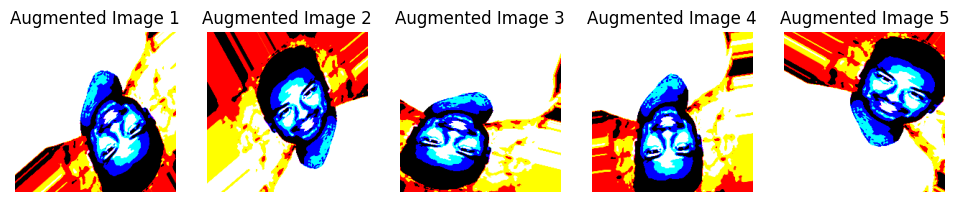

In [29]:
plt.figure(figsize=(12, 6))
for i, augmented_img_array in enumerate(augmented_images):
    plt.subplot(1, num_augmented_images, i + 1)
    plt.imshow(augmented_img_array)
    plt.title(f"Augmented Image {i + 1}")
    plt.axis('off')
plt.show()